# 문제 정의
## 28x28 픽셀의 손글씨 숫자 이미지를 입력받아서 실제로 의미하는 숫자를 인식해보자

# 가설
## 784개의 특징 데이터를 구성한 뒤 머신러닝으로 어떤 숫자인지 추측 가능

# 목표
## 28x28사이즈의 이미지로부터 label값을 얻어낸다

# 데이터 구성
## 784개 입력 특징 (28x28 pixel)
**출력 데이터 ** label
데이터의 총 행수 10000개

# 분석 단계
## 단계1) 데이터를 불러온다
## 단계2) EDA & Feature Engineering
## 단계3) data set을 구성
## 단계4) modeling하고 학습
## 단계5) model 검증


# 1. 데이터를 불러오기

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('digit.csv')
df.head(10)

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


# 2. EDA & Feature Engineering

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [37]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


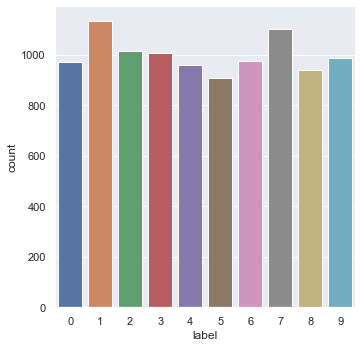

In [38]:
sns.catplot(data = df, x = 'label', kind = 'count')

# 이미지 살펴보기

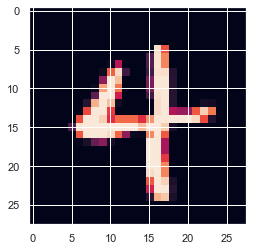

In [44]:
numbers = df.drop(['label'], axis = 1)

nth = 0 # 0~9999까지 조절 가능
img = np.reshape(numbers.iloc[nth].values, [28, 28])
plt.imshow(img)
plt.show()

In [39]:
numbers.iloc[0].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# data set 구성하기

In [46]:
input_data = df.drop(['label'], axis = 1)
target_data = df['label']

print(input_data.shape, target_data.shape)

(10000, 784) (10000,)


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

print(x_train.shape, x_test.shape) # 열 수는 784로 동일/ test_size = 0.2 설정안하면 기본은 75:25로 나눠짐

(8000, 784) (2000, 784)


# 4. modeling & 학습

In [56]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))

training set accuracy: 1.0


# 5.모델 검증

In [57]:
print('test set accuracy:', tree.score(x_test, y_test))

test set accuracy: 0.801


In [52]:
prediction = tree.predict(x_test)
prediction

array([7, 7, 2, ..., 1, 9, 1], dtype=int64)

# RandomForest modeling & 학습

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)

print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 1.0


# RandomForest 모델 검증

In [61]:
print('test set accuracy:', forest.score(x_test, y_test))

test set accuracy: 0.952


In [62]:
prediction2 = forest.predict(x_test)
prediction2

array([7, 7, 2, ..., 1, 4, 1], dtype=int64)

# 실제 예측 결과물 살펴보기

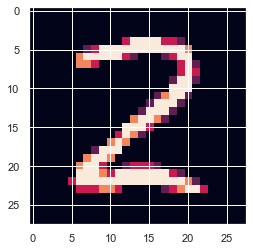

인식된 숫자는 2 입니다!


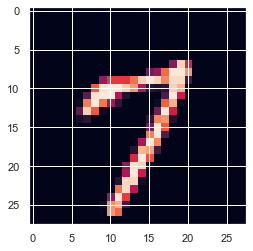

인식된 숫자는 7 입니다!


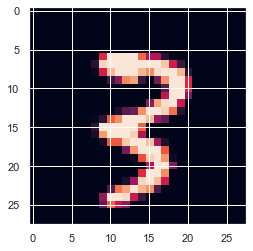

인식된 숫자는 3 입니다!


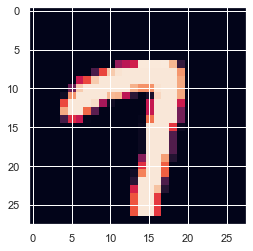

인식된 숫자는 7 입니다!


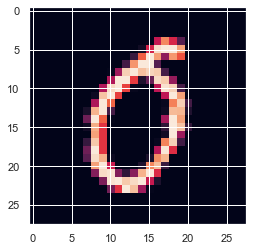

인식된 숫자는 0 입니다!


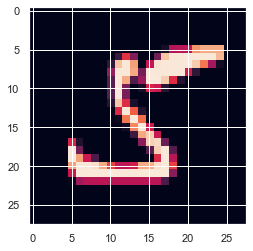

인식된 숫자는 5 입니다!


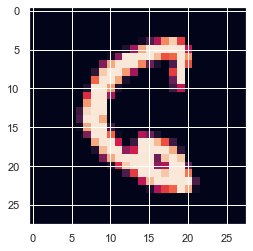

인식된 숫자는 6 입니다!


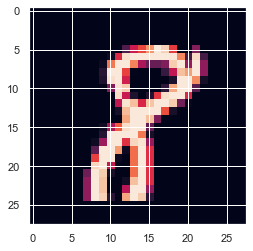

인식된 숫자는 8 입니다!


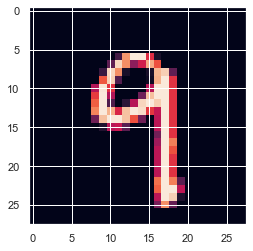

인식된 숫자는 9 입니다!


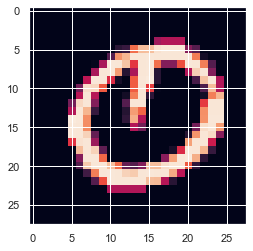

인식된 숫자는 0 입니다!


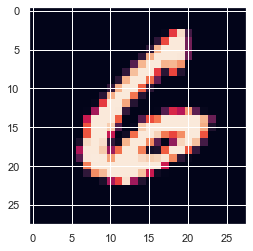

인식된 숫자는 6 입니다!


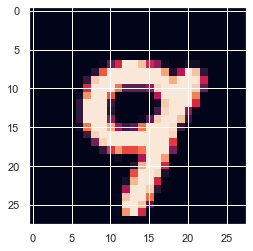

인식된 숫자는 9 입니다!


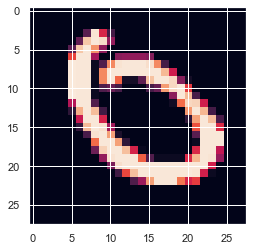

인식된 숫자는 0 입니다!


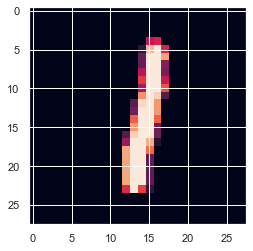

인식된 숫자는 1 입니다!


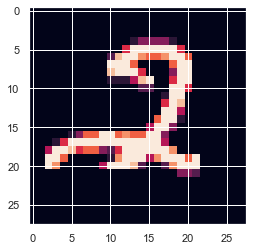

인식된 숫자는 2 입니다!


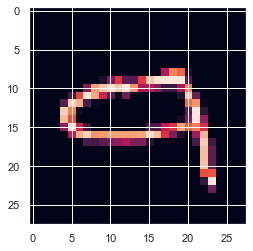

인식된 숫자는 4 입니다!


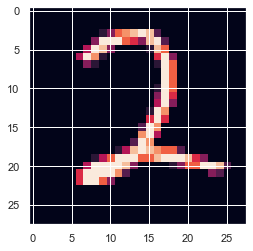

인식된 숫자는 2 입니다!


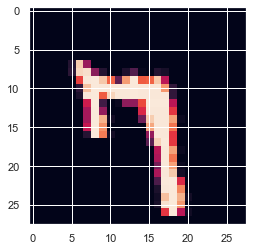

인식된 숫자는 7 입니다!


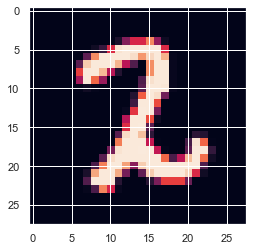

인식된 숫자는 2 입니다!


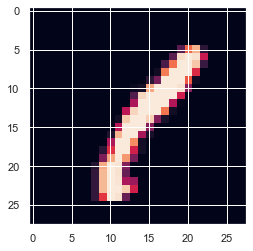

인식된 숫자는 1 입니다!


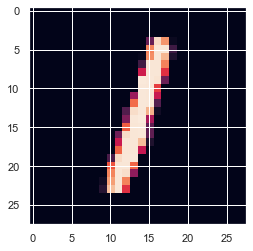

인식된 숫자는 1 입니다!


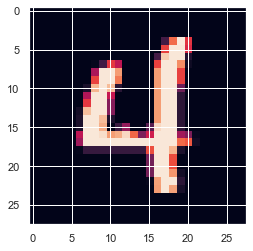

인식된 숫자는 4 입니다!


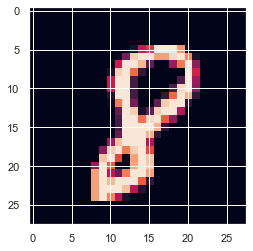

인식된 숫자는 8 입니다!


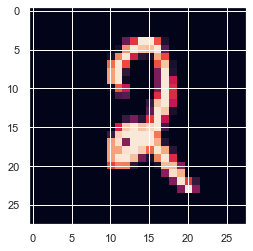

인식된 숫자는 2 입니다!


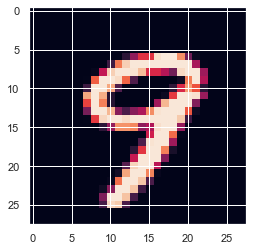

인식된 숫자는 9 입니다!


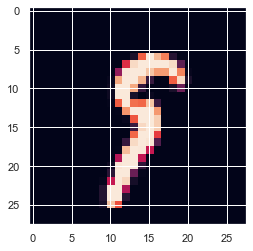

인식된 숫자는 9 입니다!


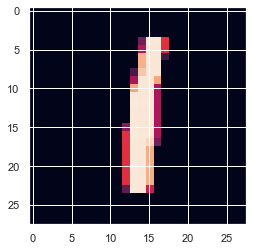

인식된 숫자는 1 입니다!


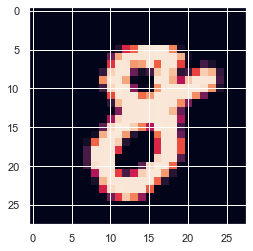

인식된 숫자는 8 입니다!


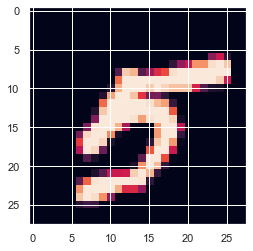

인식된 숫자는 5 입니다!


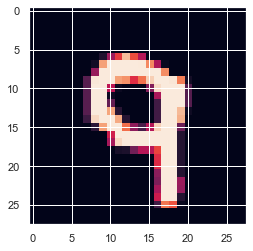

인식된 숫자는 9 입니다!


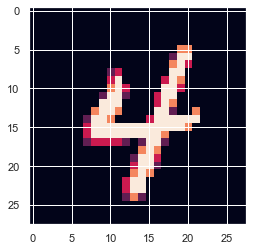

인식된 숫자는 4 입니다!


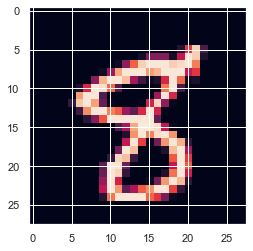

인식된 숫자는 8 입니다!


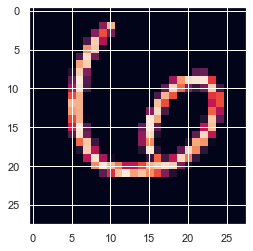

인식된 숫자는 6 입니다!


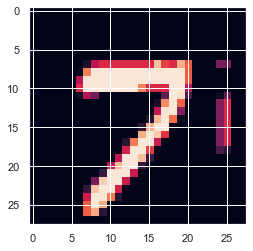

인식된 숫자는 7 입니다!


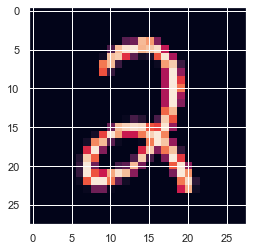

인식된 숫자는 2 입니다!


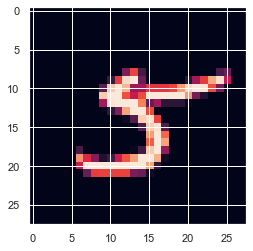

인식된 숫자는 5 입니다!


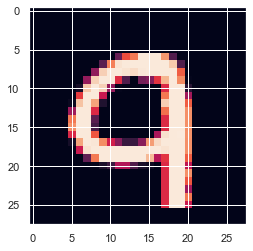

인식된 숫자는 9 입니다!


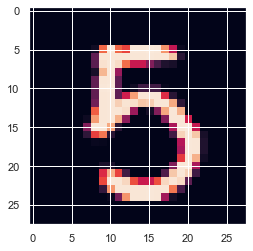

인식된 숫자는 5 입니다!


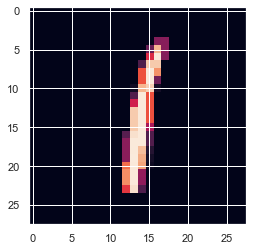

인식된 숫자는 1 입니다!


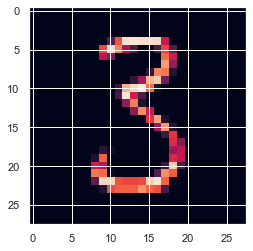

인식된 숫자는 3 입니다!


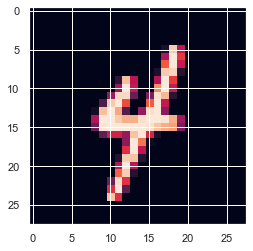

인식된 숫자는 4 입니다!


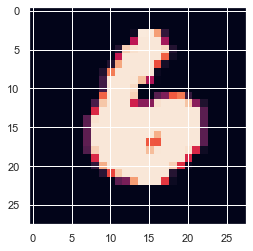

인식된 숫자는 6 입니다!


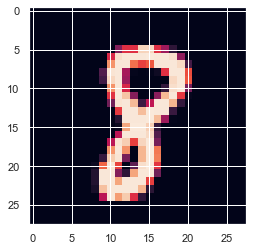

인식된 숫자는 8 입니다!


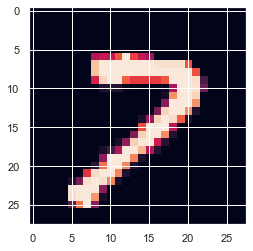

인식된 숫자는 7 입니다!


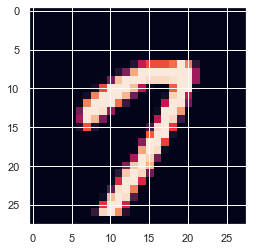

인식된 숫자는 7 입니다!


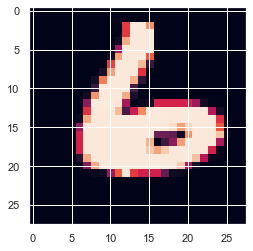

인식된 숫자는 6 입니다!


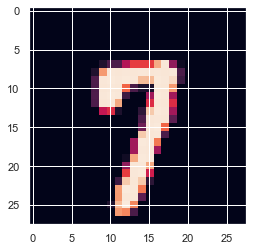

인식된 숫자는 7 입니다!


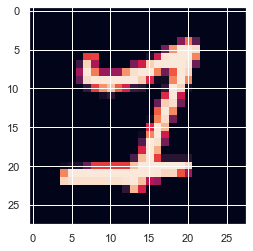

인식된 숫자는 3 입니다!


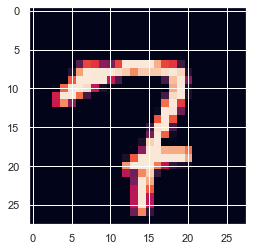

인식된 숫자는 7 입니다!


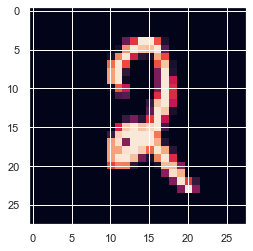

인식된 숫자는 2 입니다!


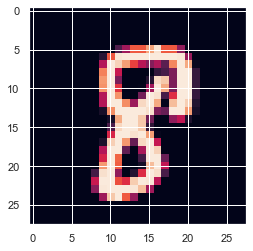

인식된 숫자는 8 입니다!


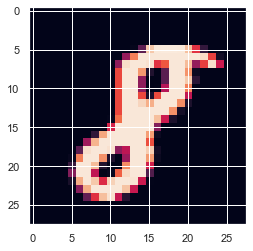

인식된 숫자는 8 입니다!


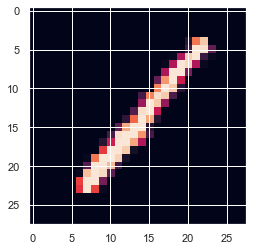

인식된 숫자는 1 입니다!


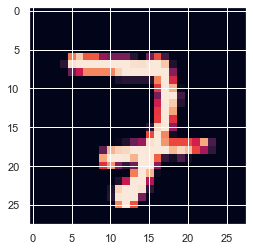

인식된 숫자는 7 입니다!


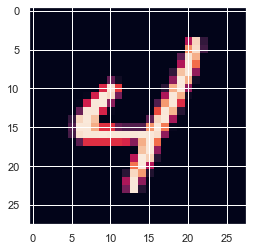

인식된 숫자는 4 입니다!


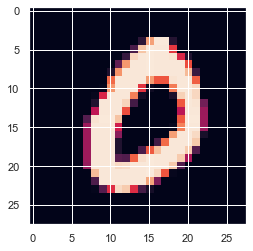

인식된 숫자는 0 입니다!


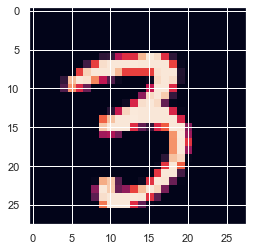

인식된 숫자는 3 입니다!


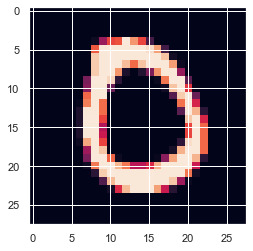

인식된 숫자는 0 입니다!


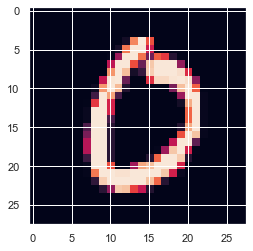

인식된 숫자는 0 입니다!


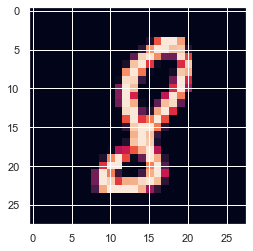

인식된 숫자는 8 입니다!


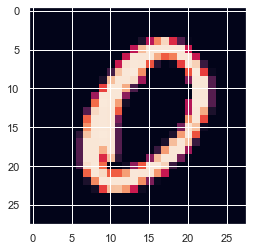

인식된 숫자는 0 입니다!


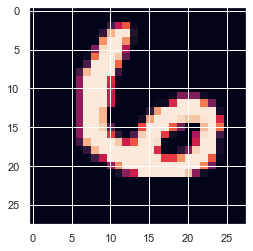

인식된 숫자는 6 입니다!


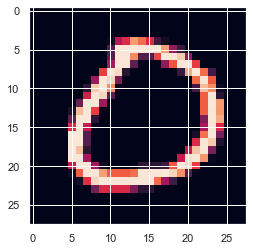

인식된 숫자는 0 입니다!


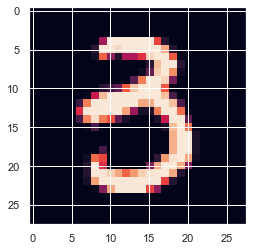

인식된 숫자는 3 입니다!


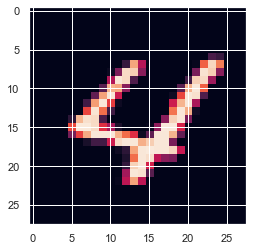

인식된 숫자는 4 입니다!


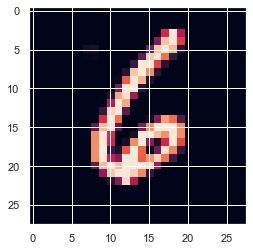

인식된 숫자는 6 입니다!


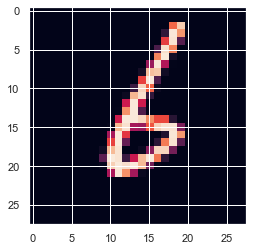

인식된 숫자는 6 입니다!


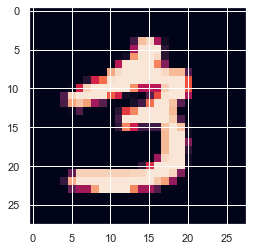

인식된 숫자는 3 입니다!


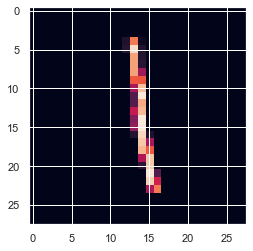

인식된 숫자는 1 입니다!


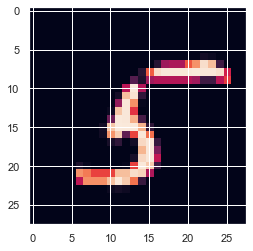

인식된 숫자는 5 입니다!


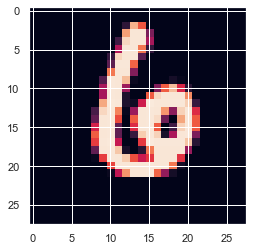

인식된 숫자는 6 입니다!


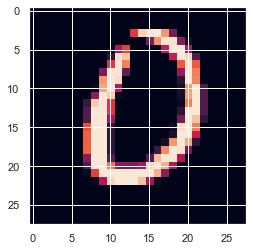

인식된 숫자는 0 입니다!


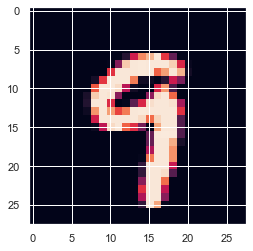

인식된 숫자는 9 입니다!


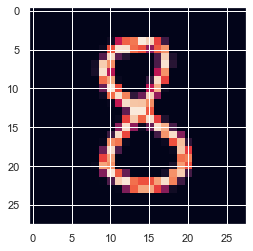

인식된 숫자는 8 입니다!


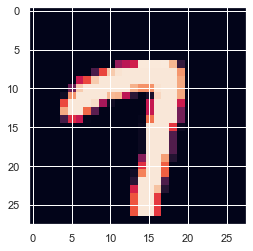

인식된 숫자는 7 입니다!


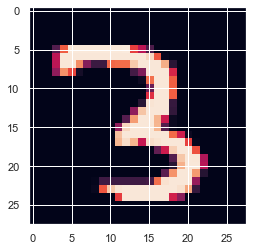

인식된 숫자는 3 입니다!


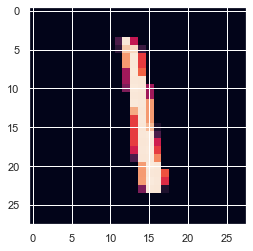

인식된 숫자는 1 입니다!


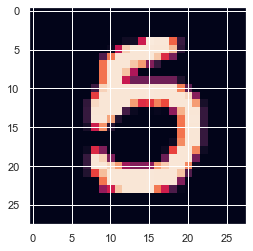

인식된 숫자는 0 입니다!


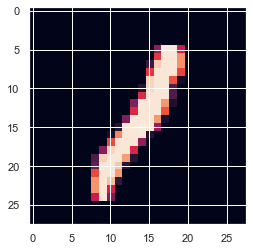

인식된 숫자는 1 입니다!


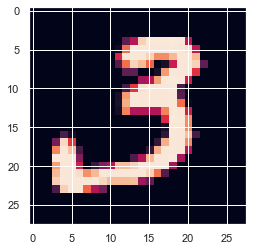

인식된 숫자는 3 입니다!


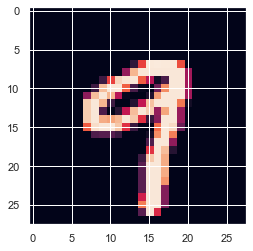

인식된 숫자는 9 입니다!


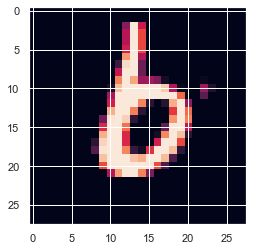

인식된 숫자는 6 입니다!


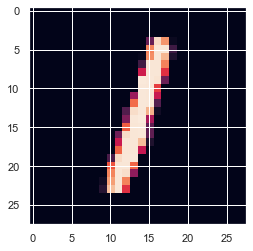

인식된 숫자는 1 입니다!


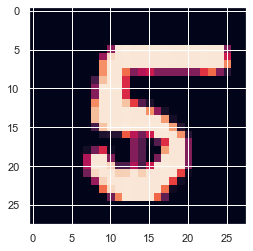

인식된 숫자는 5 입니다!


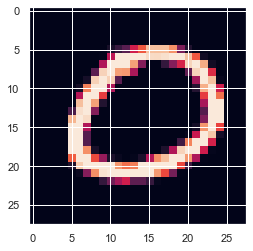

인식된 숫자는 0 입니다!


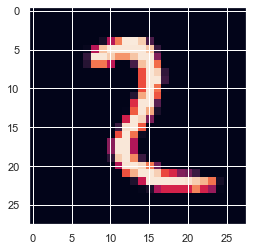

인식된 숫자는 2 입니다!


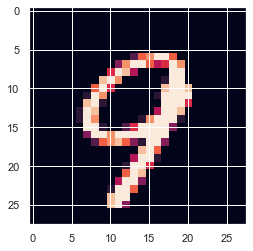

인식된 숫자는 9 입니다!


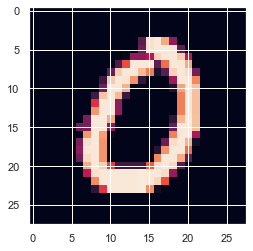

인식된 숫자는 0 입니다!


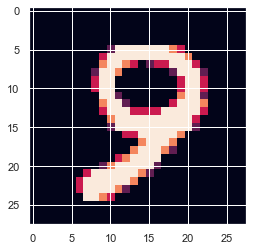

인식된 숫자는 8 입니다!


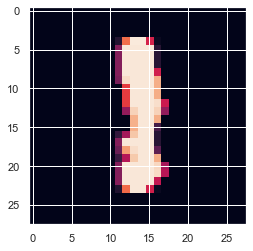

인식된 숫자는 1 입니다!


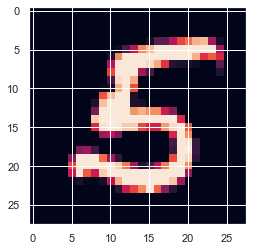

인식된 숫자는 5 입니다!


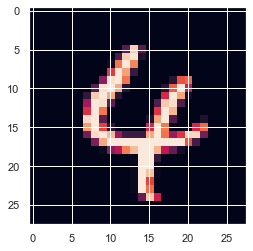

인식된 숫자는 4 입니다!


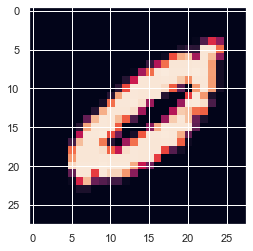

인식된 숫자는 0 입니다!


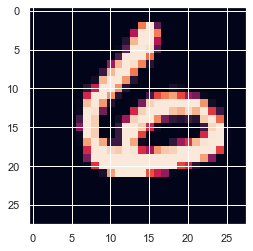

인식된 숫자는 6 입니다!


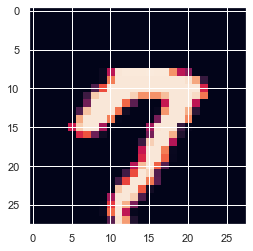

인식된 숫자는 7 입니다!


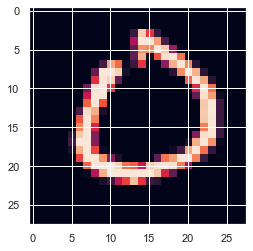

인식된 숫자는 0 입니다!


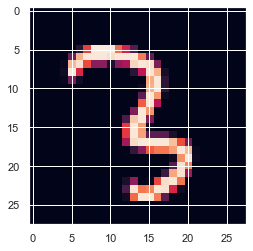

인식된 숫자는 3 입니다!


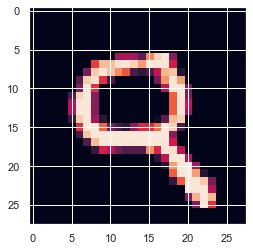

인식된 숫자는 9 입니다!


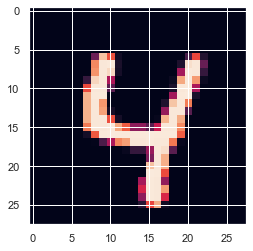

인식된 숫자는 4 입니다!


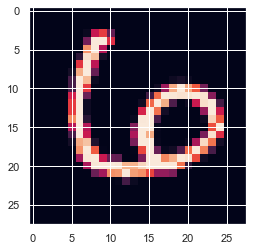

인식된 숫자는 6 입니다!


In [66]:
#random으로 100개의 숫자 정확도 살펴보기
import random
for i in range(100):
    n = random.randrange(0, len(x_test))
    
    img = np.reshape(x_test.iloc[n].values, [28, 28])
    plt.imshow(img)
    plt.show()
    
    result = forest.predict([x_test.iloc[n].values])[0]
    print('인식된 숫자는', result, '입니다!')